In [1]:
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline
import folium
from folium import plugins 
from folium.plugins import HeatMap
from tqdm import tqdm
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [7]:
! pip install telethon

In [96]:
import pandas as pd
from telethon.sync import TelegramClient

name = 'anon' 
api_id = input()
api_hash = input() 
chat = 't.me/elonmusktwitter'

data = [] # stores all our data 

async with TelegramClient(name, api_id, api_hash) as client:
    async for message in client.iter_messages(chat):
        data.append([message.sender_id, message.text, message.date])


df = pd.DataFrame(data, columns=['SENDER', 'MESSAGE', 'DATE']) # creates a new dataframe




In [97]:
df['DATE'] = df['DATE'].dt.floor('H')
df['DATE'] = df['DATE'].dt.strftime("%Y-%m-%d %H:%M:%S")

In [98]:
df.rename(columns={'DATE': 'date'}, inplace=True)
df.head()

SENDER                                            MESSAGE  \
0 -1001153434921  @PeterDiamandis Write it on Twitter! Our algor...   
1 -1001153434921  @Kristennetten It‚Äôs pretty wild in the Notes w...   
2 -1001153434921  @levelsio Good idea ‚Äî Elon Musk (@elonmusk) [M...   
3 -1001153434921  @Gfilche @neuralink Human output data rate is ...   
4 -1001153434921  @AviSchiffmann Neuralink ‚Äî Elon Musk (@elonmus...   

                  date  
0  2023-05-23 16:00:00  
1  2023-05-23 16:00:00  
2  2023-05-23 14:00:00  
3  2023-05-23 00:00:00  
4  2023-05-23 00:00:00

In [99]:
df = df.dropna(subset=['MESSAGE'])
df = df[df['MESSAGE'] != ""]

In [100]:
df.head(100)

SENDER                                            MESSAGE  \
0  -1001153434921  @PeterDiamandis Write it on Twitter! Our algor...   
1  -1001153434921  @Kristennetten It‚Äôs pretty wild in the Notes w...   
2  -1001153434921  @levelsio Good idea ‚Äî Elon Musk (@elonmusk) [M...   
3  -1001153434921  @Gfilche @neuralink Human output data rate is ...   
4  -1001153434921  @AviSchiffmann Neuralink ‚Äî Elon Musk (@elonmus...   
..            ...                                                ...   
95 -1001153434921  ü§Øü§Ø https://t.co/651ELItFSY ‚Äî Elon Musk (@elonm...   
96 -1001153434921  @shellenberger @galexybrane ‚ÄúFBI says it won‚Äôt...   
97 -1001153434921  @chazman @Tesla The Tesla AI/software team is ...   
98 -1001153434921  @ylecun ü§£ ‚Äî Elon Musk (@elonmusk) [May 18, 202...   
99 -1001153434921  @goth600 ü§£ ‚Äî Elon Musk (@elonmusk) [May 18, 20...   

                   date  
0   2023-05-23 16:00:00  
1   2023-05-23 16:00:00  
2   2023-05-23 14:00:00  
3   2023-05-23 00:00:00  
4   2023-05-23 00:00:00  
..                  ...  
95  2023-05-19 01:00:00  
96  2023-05-19 01:00:00  
97  2023-05-19 00:00:00  
98  2023-05-19 00:00:00  
99  2023-05-19 00:00:00  

[100 rows x 3 columns]

In [101]:
btc_dataset = pd.read_csv("/Users/Admin/Desktop/Elon-Musk-Cryptocurrency-Influence-main/BTC-Hourly.csv")
btc_dataset.head()

unix                 date   symbol      open      high       low  \
0  1646092800  2022-03-01 00:00:00  BTC/USD  43221.71  43626.49  43185.48   
1  1646089200  2022-02-28 23:00:00  BTC/USD  43085.30  43364.81  42892.37   
2  1646085600  2022-02-28 22:00:00  BTC/USD  41657.23  44256.08  41650.29   
3  1646082000  2022-02-28 21:00:00  BTC/USD  41917.09  41917.09  41542.60   
4  1646078400  2022-02-28 20:00:00  BTC/USD  41361.99  41971.00  41284.11   

      close  Volume BTC    Volume USD  
0  43312.27   52.056320  2.254677e+06  
1  43178.98  106.816103  4.612210e+06  
2  42907.32  527.540571  2.263535e+07  
3  41659.53   69.751680  2.905822e+06  
4  41914.97  247.151654  1.035935e+07

In [102]:
# Keyword Matching for dataseet
crypto_keywords = ["Bitcoin", "BTC", "Crypto", "Cryptocurrency", "Dogecoin", "Bit coin", "Cryptomarket", "Market", "crypto", "bitcoin"]
df['is_crypto_related'] = False

for keyword in crypto_keywords:
    df['is_crypto_related'] |= df['MESSAGE'].str.contains(keyword, case=False)

df = df.sort_values('date')
btc_dataset = btc_dataset.sort_values('date')

# merging the datasets
df['date'] = pd.to_datetime(df['date'])
btc_dataset['date'] = pd.to_datetime(btc_dataset['date'])
merged_data = pd.merge_asof(df, btc_dataset, left_on='date', right_on='date')
grouped_data = merged_data.groupby('SENDER')
grouped_data.head()

# Mean Bitcoin before and after
hours_before = 48 
hours_after = 48  

mean_prices = []
dates = []

for sender, data in grouped_data:
    tweet_dates = data['date']
    for tweet_date in tweet_dates:
        start_time = tweet_date - pd.Timedelta(hours=hours_before)
        end_time = tweet_date + pd.Timedelta(hours=hours_after)
        prices_before = data[(data['date'] >= start_time) & (data['date'] < tweet_date)]['close']
        prices_after = data[(data['date'] > tweet_date) & (data['date'] <= end_time)]['close']
        mean_before = prices_before.mean()
        mean_after = prices_after.mean()
        mean_prices.append(mean_after - mean_before)
        dates.append(tweet_date)

# new result df
result_df = pd.DataFrame({'date': dates, 'price_change': mean_prices})

# defining threshold for the price movement
threshold = 2500
significant_changes = result_df[abs(result_df['price_change']) > threshold]

# falls and jumps
price_jumps = significant_changes[significant_changes['price_change'] > 0]
price_falls = significant_changes[significant_changes['price_change'] < 0]

fig = go.Figure()
fig.add_trace(go.Scatter(x=price_jumps['date'], y=price_jumps['price_change'],
                         mode='markers', marker=dict(color='green'), name='Price jump'))
fig.add_trace(go.Scatter(x=price_falls['date'], y=price_falls['price_change'],
                         mode='markers', marker=dict(color='red'), name='Price fall'))
fig.update_layout(title='Bitcoins price movement after Elon Musks Tweets',
                  xaxis=dict(title='Date'),
                  yaxis=dict(title='Price Movement'))
fig.show()


In [103]:
from math import ceil, sqrt

def movmean(v, kb, kf):
    """
    Computes the mean with a window of length kb+kf+1 that includes the element 
    in the current position, kb elements backward, and kf elements forward.
    Nonexisting elements at the edges get substituted with NaN.
    Args:
        v (list(float)): List of values.
        kb (int): Number of elements to include before current position
        kf (int): Number of elements to include after current position
    Returns:
        list(float): List of the same size as v containing the mean values
    """
    m = len(v) * [np.nan]
    for i in range(kb, len(v)-kf):
        m[i] = np.mean(v[i-kb:i+kf+1])
    return m


def LeeMykland(S, sampling, significance_level=0.01):
    """
    "Jumps in Equilibrium Prices and Market Microstructure Noise"
    - by Suzanne S. Lee and Per A. Mykland
    
    "https://galton.uchicago.edu/~mykland/paperlinks/LeeMykland-2535.pdf"
    
    Args:
        S (list(float)): An array containing prices, where each entry 
                         corresponds to the price sampled every 'sampling' minutes.
        sampling (int): Minutes between entries in S
        significance_level (float): Defaults to 1% (0.001)
        
    Returns:
        A pandas dataframe containing a row covering the interval 
        [t_i, t_i+sampling] containing the following values:
        J:   Binary value is jump with direction (sign)
        L:   L statistics
        T:   Test statistics
        sig: Volatility estimate
    """
    tm = 252*24*60 # Trading minutes
    k   = ceil(sqrt(tm/sampling))
    r = np.append(np.nan, np.diff(np.log(S)))
    bpv = np.multiply(np.absolute(r[:]), np.absolute(np.append(np.nan, r[:-1])))
    bpv = np.append(np.nan, bpv[0:-1]).reshape(-1,1) # Realized bipower variation
    sig = np.sqrt(movmean(bpv, k-3, 0)) # Volatility estimate
    L   = r/sig
    n   = np.size(S) # Length of S
    c   = (2/np.pi)**0.5
    Sn  = c*(2*np.log(n))**0.5
    Cn  = (2*np.log(n))**0.5/c - np.log(np.pi*np.log(n))/(2*c*(2*np.log(n))**0.5)
    beta_star   = -np.log(-np.log(1-significance_level)) # Jump threshold
    T   = (abs(L)-Cn)*Sn
    J   = (T > beta_star).astype(float)
    J   = J*np.sign(r) # Add direction
    # First k rows are NaN involved in bipower variation estimation are set to NaN.
    J[0:k] = np.nan
    # Build and return result dataframe
    return pd.DataFrame({'L': L,'sig': sig, 'T': T,'J':J})


prices = merged_data['open'].tolist()

sampling = 60 

result = LeeMykland(prices, sampling)

merged_data = pd.concat([merged_data, result], axis=1)

merged_data.head()


/var/folders/49/1bqwbw2539j4jwl3zcbb_hb00000gn/T/ipykernel_69481/3454725003.py:48: RuntimeWarning:

invalid value encountered in true_divide



SENDER                                            MESSAGE  \
0 -1001153434921                             I love science, bitch!   
1 -1001153434921  Here's a [@Tesla](https://twitter.com/Tesla?re...   
2 -1001153434921  –°–∫–æ—Ä–æ –æ—Å—É—â–µ—Å—Ç–≤–∏–º —Ç–≤–∏—Ç—ã –Ω–∞ —Ä—É—Å—Å–∫–æ–º, –≤–µ–¥—ë—Ç—Å—è —Ä–∞–±...   
3 -1001153434921  Probably 2028 for a base to be built‚Äî Elon Mus...   
4 -1001153434921  [pic.twitter.com/Fn0hKJd3uJ](https://t.co/Fn0h...   

                 date  is_crypto_related        unix   symbol     open  \
0 2018-09-21 05:00:00              False  1537506000  BTC/USD  6543.23   
1 2018-09-21 19:00:00              False  1537556400  BTC/USD  6733.72   
2 2018-09-21 19:00:00              False  1537556400  BTC/USD  6733.72   
3 2018-09-21 21:00:00              False  1537563600  BTC/USD  6708.33   
4 2018-09-21 21:00:00              False  1537563600  BTC/USD  6708.33   

      high      low    close  Volume BTC  Volume USD   L  sig   T   J  
0  6547.45  6519.56  6531.34  1076859.99      164.86 NaN  NaN NaN NaN  
1  6775.34  6726.76  6753.09  2588323.98      383.44 NaN  NaN NaN NaN  
2  6775.34  6726.76  6753.09  2588323.98      383.44 NaN  NaN NaN NaN  
3  6741.59  6691.28  6713.09  1683900.57      250.84 NaN  NaN NaN NaN  
4  6741.59  6691.28  6713.09  1683900.57      250.84 NaN  NaN NaN NaN

In [104]:
merged_data.head(555)

SENDER                                            MESSAGE  \
0   -1001153434921                             I love science, bitch!   
1   -1001153434921  Here's a [@Tesla](https://twitter.com/Tesla?re...   
2   -1001153434921  –°–∫–æ—Ä–æ –æ—Å—É—â–µ—Å—Ç–≤–∏–º —Ç–≤–∏—Ç—ã –Ω–∞ —Ä—É—Å—Å–∫–æ–º, –≤–µ–¥—ë—Ç—Å—è —Ä–∞–±...   
3   -1001153434921  Probably 2028 for a base to be built‚Äî Elon Mus...   
4   -1001153434921  [pic.twitter.com/Fn0hKJd3uJ](https://t.co/Fn0h...   
..             ...                                                ...   
550 -1001153434921  Obv must be more pointy tho‚Äî Elon Musk (@elonm...   
551 -1001153434921  Falcon 9 and 10 Iridium NEXT satellites vertic...   
552 -1001153434921  Ok‚Äî Elon Musk (@elonmusk) [January 12, 2019](h...   
553 -1001153434921  View of SpaceX Dragon 1 berthed with [@Space_S...   
554 -1001153434921  Which country? There is a 10% import duty, ~20...   

                   date  is_crypto_related        unix   symbol     open  \
0   2018-09-21 05:00:00              False  1537506000  BTC/USD  6543.23   
1   2018-09-21 19:00:00              False  1537556400  BTC/USD  6733.72   
2   2018-09-21 19:00:00              False  1537556400  BTC/USD  6733.72   
3   2018-09-21 21:00:00              False  1537563600  BTC/USD  6708.33   
4   2018-09-21 21:00:00              False  1537563600  BTC/USD  6708.33   
..                  ...                ...         ...      ...      ...   
550 2019-01-11 10:00:00              False  1547200800  BTC/USD  3635.82   
551 2019-01-11 11:00:00              False  1547204400  BTC/USD  3627.87   
552 2019-01-12 21:00:00              False  1547326800  BTC/USD  3632.35   
553 2019-01-13 18:00:00              False  1547402400  BTC/USD  3519.40   
554 2019-01-13 18:00:00              False  1547402400  BTC/USD  3519.40   

        high      low    close  Volume BTC  Volume USD         L       sig  \
0    6547.45  6519.56  6531.34  1076859.99      164.86       NaN       NaN   
1    6775.34  6726.76  6753.09  2588323.98      383.44       NaN       NaN   
2    6775.34  6726.76  6753.09  2588323.98      383.44       NaN       NaN   
3    6741.59  6691.28  6713.09  1683900.57      250.84       NaN       NaN   
4    6741.59  6691.28  6713.09  1683900.57      250.84       NaN       NaN   
..       ...      ...      ...         ...         ...       ...       ...   
550  3642.51  3605.73  3627.87  2099188.65      578.06 -0.604066  0.006199   
551  3640.00  3626.22  3640.00  1544831.08      425.28 -0.351428  0.006229   
552  3641.12  3626.27  3628.93   233169.99       64.20  0.197857  0.006237   
553  3523.96  3499.55  3504.24  2120489.27      604.00 -5.062158  0.006240   
554  3523.96  3499.55  3504.24  2120489.27      604.00  0.000000  0.006281   

             T    J  
0          NaN  NaN  
1          NaN  NaN  
2          NaN  NaN  
3          NaN  NaN  
4          NaN  NaN  
..         ...  ...  
550 -15.975623 -0.0  
551 -16.873535 -0.0  
552 -17.419349  0.0  
553  -0.130901 -0.0  
554 -18.122564  0.0  

[555 rows x 16 columns]

In [105]:
filtered_df = merged_data[merged_data['J'] == 1]

filtered_df.head()

SENDER                                            MESSAGE  \
129 -1001153434921  Tiny wizard üßô&zwj;‚ôÇÔ∏è‚Äî Elon Musk (@elonmusk) [N...   
279 -1001153434921  Totally false. Buried in this incredibly misle...   
332 -1001153434921  Thanks, will consider next year‚Äî Elon Musk (@e...   
366 -1001153434921  Thanks!‚Äî Elon Musk (@elonmusk) [December 23, 2...   
382 -1001153434921  When it‚Äôs no longer noticeable over Planck‚Äôs l...   

                   date  is_crypto_related        unix   symbol     open  \
129 2018-11-28 08:00:00              False  1543392000  BTC/USD  4020.41   
279 2018-12-18 06:00:00              False  1545112800  BTC/USD  3483.43   
332 2018-12-20 15:00:00              False  1545318000  BTC/USD  4030.10   
366 2018-12-23 01:00:00              False  1545526800  BTC/USD  3992.68   
382 2018-12-24 07:00:00              False  1545634800  BTC/USD  4186.58   

        high      low    close  Volume BTC  Volume USD          L       sig  \
129  4039.41  3950.98  3961.00  2658186.89      665.04   9.117252  0.008822   
279  3499.96  3481.08  3488.56   920554.59      263.73  11.927197  0.006852   
332  4070.68  3980.83  4022.53  3807600.11      944.24  10.712101  0.006986   
366  4020.00  3970.03  3990.63   958321.82      239.90   9.301475  0.003504   
382  4206.58  4179.90  4187.14  1293667.41      308.51  19.688731  0.002942   

             T    J  
129  14.281512  1.0  
279  24.268472  1.0  
332  19.949843  1.0  
366  14.936267  1.0  
382  51.854124  1.0

In [107]:
final_df = filtered_df[(filtered_df['is_crypto_related'] == True) & (filtered_df['J'] == 1)]
final_df.head()

SENDER                                            MESSAGE  \
8611 -1001153434921  Spoke with North American Bitcoin miners. They...   

                    date  is_crypto_related        unix   symbol      open  \
8611 2021-05-24 20:00:00               True  1621886400  BTC/USD  39680.99   

         high       low    close  Volume BTC    Volume USD         L  \
8611  39960.0  38800.49  39024.9  629.970075  2.458452e+07  6.543983   

           sig         T    J  
8611  0.019404  5.135728  1.0

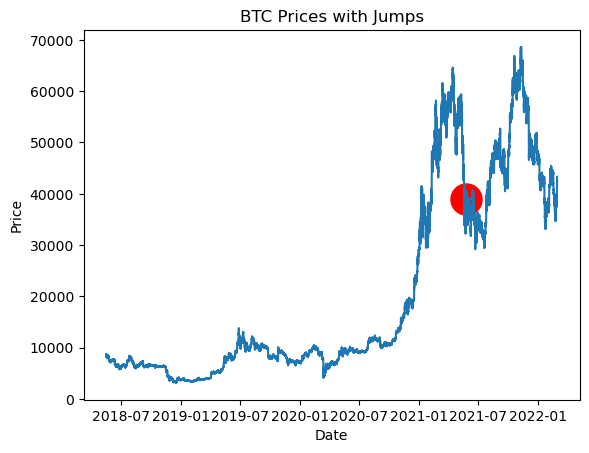

In [119]:
import matplotlib.pyplot as plt

plt.plot(btc_dataset['date'], btc_dataset['close'], label='Prices')

jump_indices = final_df[final_df['J'] == 1].index
jump_dates = final_df.loc[jump_indices, 'date']
jump_prices = final_df.loc[jump_indices, 'close']
plt.scatter(jump_dates, jump_prices, color='red', marker='o', s=500, alpha=1, label='Jumps')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('BTC Prices with Jumps')
plt.show()
